In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

# Pro-imports legislators in Tsai era

In [2]:
data = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/proimportsspeech_tsai.xlsx")
data.fillna("",inplace=True)
lmspeech = list(data['text'])
data.head()

,name,sitting,date,text
0,黃昭順,立法院第9屆第1會期社會福利及衛生環境委員會第28次全體委員會議,2016-05-30,\n主席、各位列席官員、各位同仁。本席要請教林部長，在我質詢以前，我想把一段影片讓部長先看一...
1,高志鵬,立法院第9屆第1會期經濟委員會第20次全體委員會議,2016-05-30,\n主席、各位列席官員、各位同仁。剛剛很位國民黨委員關心美豬議題，也做了一些決議，雖然大家都...
2,高嘉瑜,立法院第10屆第2會期第1次會議,2020-09-18,\n（11時 57分）主席、行政院蘇院長、各部會首長、各位同仁。昨天媒體雜誌有報導一個民調，...
3,莊瑞雄,立法院第10屆第2會期第1次會議,2020-09-18,\n（14時 30分）主席、行政院蘇院長、各部會首長、各位同仁。早上我聽了這麼多委員的質詢，...
4,江永昌,立法院第10屆第2會期社會福利及衛生環境委員會第2次全體委員會議,2020-09-30,\n（14時 57分）主席、各位列席官員、各位同仁。次長，本席要請問你關於總預算的問題，這一...


In [3]:
jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech]
for idx, speech in enumerate(lmspeech):
    lmspeech[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.004 seconds.
Prefix dict has been built successfully.


In [4]:
swo = pd.DataFrame(columns=['發言內容'], data = lmspeech)
swo.to_excel("test_bnfma.xlsx", encoding='UTF-8')

In [5]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech)
    bag_of_words = vec.transform(lmspeech)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(lmspeech, 10)
for word, freq in common_words:
    print(word, freq)

臺灣 291
進口 231
豬肉 173
美國 170
美豬 164
標示 146
學校 131
萊克多巴胺 127
農委會 105
食品 102


In [6]:
#Plotting the bar graph using plotly package
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_plotly = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
tsai_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of pro-imports legislators in Tsai era')

In [7]:
common_words

[('臺灣', 291),
 ('進口', 231),
 ('豬肉', 173),
 ('美國', 170),
 ('美豬', 164),
 ('標示', 146),
 ('學校', 131),
 ('萊克多巴胺', 127),
 ('農委會', 105),
 ('食品', 102)]

In [8]:
#Coverting list (common_words) to data frame
common_words
cwdf = pd.DataFrame(common_words, columns=['Terms', 'Freq.'])  
print(cwdf)

   Terms  Freq.
0     臺灣    291
1     進口    231
2     豬肉    173
3     美國    170
4     美豬    164
5     標示    146
6     學校    131
7  萊克多巴胺    127
8    農委會    105
9     食品    102


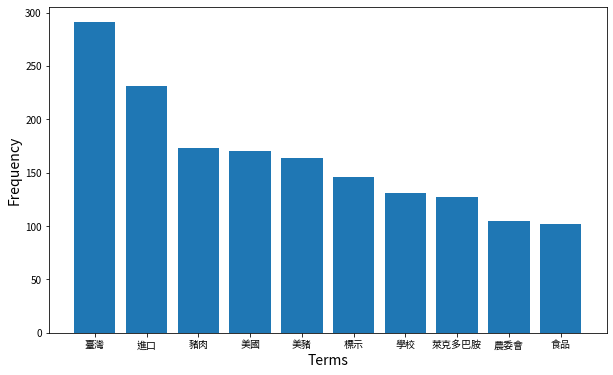

In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
plt.bar(cwdf['Terms'],
       cwdf['Freq.'])

plt.xlabel('Terms', fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of pro-imports legislators in Tsai era", fontsize = 18)

plt.show()